In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

### 데이터 살펴보기

In [63]:
adult_df = pd.read_csv('../adult.csv')
print(adult_df.head(3))

   age          workclass  fnlwgt   education  ecudation_number  \
0   39          State-gov   77516   Bachelors                13   
1   50   Self-emp-not-inc   83311   Bachelors                13   
2   38            Private  215646     HS-grad                 9   

        marital_status          occupation    relationship    race    sex  \
0        Never-married        Adm-clerical   Not-in-family   White   Male   
1   Married-civ-spouse     Exec-managerial         Husband   White   Male   
2             Divorced   Handlers-cleaners   Not-in-family   White   Male   

   capital_gain  capital_loss  hours_per_week  native_country    wage  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  


In [4]:
print(adult_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               32561 non-null  int64 
 1   workclass         32561 non-null  object
 2   fnlwgt            32561 non-null  int64 
 3   education         32561 non-null  object
 4   ecudation_number  32561 non-null  int64 
 5   marital_status    32561 non-null  object
 6   occupation        32561 non-null  object
 7   relationship      32561 non-null  object
 8   race              32561 non-null  object
 9   sex               32561 non-null  object
 10  capital_gain      32561 non-null  int64 
 11  capital_loss      32561 non-null  int64 
 12  hours_per_week    32561 non-null  int64 
 13  native_country    32561 non-null  object
 14  wage              32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [5]:
print(adult_df['workclass'].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


In [6]:
print(adult_df['occupation'].value_counts())

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64


In [7]:
print(adult_df['native_country'].value_counts())

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

#### native_country의 값을 단순하게 바꿨음
> 1. native_country의 값이 United-States인 경우 United-States = 0 으로 바꿈
> 2. native_country의 값이 United-States가 아닌 경우 Not-United-States = 1 로 바꿈

In [8]:
adult_df['native_country'] = adult_df['native_country'].apply(lambda x: 0 if x == ' United-States' else 1)
adult_df.head()

,age,workclass,fnlwgt,education,ecudation_number,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,0,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,1,<=50K


#### 데이터 중 '?' 값 제거

In [9]:
adult_df = adult_df[adult_df['workclass'] != ' ?']
adult_df = adult_df[adult_df['occupation'] != ' ?']
adult_df = adult_df[adult_df['native_country'] != ' ?']

#### wage의 값이 <=50K인 경우 0으로, >50K인 경우 1로 바꿈

In [10]:
adult_df['wage'] = adult_df['wage'].apply(lambda x: 0 if x == ' <=50K' else 1)

In [11]:
print(adult_df['race'].value_counts())

 White                 26301
 Black                  2909
 Asian-Pac-Islander      974
 Amer-Indian-Eskimo      286
 Other                   248
Name: race, dtype: int64


#### race의 값을 단순하게 바꿈
> 1. race의 값이 White인 경우 White = 0 으로 바꿈
> 2. race의 값이 Black인 경우 Black = 1 로 바꿈
> 3. race의 값이 Asian-Pac-Islander인 경우 Asian-Pac-Islander = 2 로 바꿈
> 4. race의 값이 Amer-Indian-Eskimo인 경우 Amer-Indian-Eskimo = 3 로 바꿈
> 5. race의 값이 Other인 경우 Other = 4 로 바꿈

In [12]:
adult_df['race'].replace([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'], [0, 1, 2, 3, 4], inplace=True)
adult_df.head()

,age,workclass,fnlwgt,education,ecudation_number,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,0,Male,2174,0,40,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,Male,0,0,13,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,Male,0,0,40,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,1,Male,0,0,40,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,1,Female,0,0,40,1,0


In [13]:
print(adult_df['relationship'].value_counts())

 Husband           12704
 Not-in-family      7865
 Own-child          4525
 Unmarried          3271
 Wife               1435
 Other-relative      918
Name: relationship, dtype: int64


#### 위와 마찬가지로 relationship의 값을 변경

In [14]:
adult_df['relationship'].replace([' Unmarried',' Wife',' Husband',' Not-in-family',' Own-child',' Other-relative'],[0, 1, 2, 3, 4, 5], inplace=True)
adult_df.head()

,age,workclass,fnlwgt,education,ecudation_number,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,3,0,Male,2174,0,40,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,2,0,Male,0,0,13,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,3,0,Male,0,0,40,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,2,1,Male,0,0,40,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,1,1,Female,0,0,40,1,0


#### 값의 빈칸 제거

In [15]:
adult_df = adult_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

### 값 변경 후 seaborn을 이용한 데이터 확인

<AxesSubplot:xlabel='workclass', ylabel='age'>

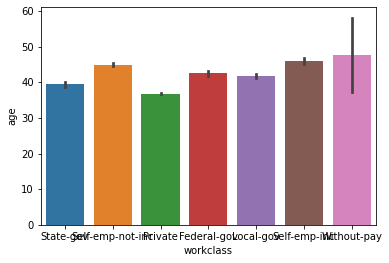

In [16]:
sns.barplot(x='workclass', y='age', data=adult_df)

<AxesSubplot:xlabel='race', ylabel='age'>

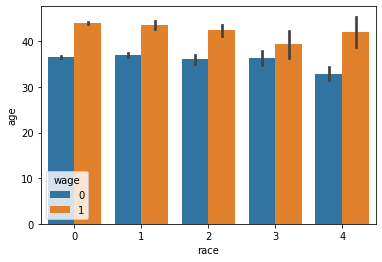

In [17]:
sns.barplot(x='race', y='age', hue='wage', data=adult_df)

<AxesSubplot:xlabel='wage', ylabel='age'>

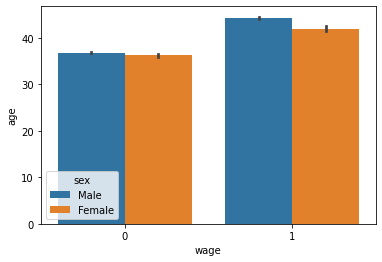

In [18]:
sns.barplot(x='wage', y='age', hue='sex', data=adult_df)

<AxesSubplot:>

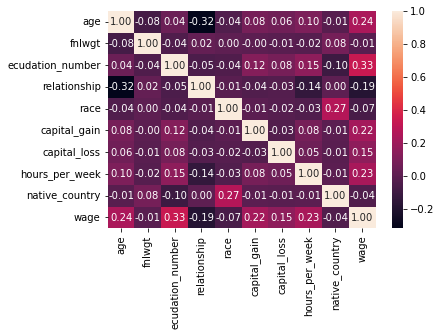

In [19]:
sns.heatmap(adult_df.corr(), annot=True, fmt='.2f')

### 필요없다고 판단한 데이터 제거 후 encoding

In [20]:
def drop_features(df):
    df.drop(['fnlwgt', 'capital_gain', 'capital_loss', 'education', 'workclass', 'occupation'], axis=1, inplace=True)
    return df

In [21]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

def format_features(df):
    features = ['marital_status', 'relationship', 'race', 'sex', 'native_country']
    for feature in features:
        le =  LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

In [22]:
def transform_features(df):
    df = drop_features(df)
    df = format_features(df)
    return df

In [23]:
from sklearn.model_selection import *

y_adult_df = adult_df['wage']
x_adult_df = adult_df.drop('wage', axis=1)

x_adult_df = transform_features(x_adult_df)
x_train, x_test, y_train, y_test = train_test_split(x_adult_df, y_adult_df, test_size=0.2, random_state=11)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=22)
rf_clf = RandomForestClassifier(random_state=22)
lr_clf = LogisticRegression(max_iter=500)

### Decision Tree, Random Forest, Logistic Regression 정확도 확인

In [25]:
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))



DecisionTreeClassifier 정확도: 0.7786
RandomForestClassifier 정확도: 0.7990
LogisticRegression 정확도: 0.7943


#### 각 모델의 정확도를 비교해보면 Random Forest가 가장 높은 정확도를 보임

### GridSearchCV를 이용한 최적의 파라미터 찾기

In [26]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2, 3, 5, 10],
                'min_samples_split': [2, 3, 5],
                'min_samples_leaf': [1, 5, 8]}

grid_dcif = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dcif.fit(x_train, y_train)

grid_rf = GridSearchCV(rf_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_rf.fit(x_train, y_train)


best_dcif = grid_dcif.best_estimator_
best_rf = grid_rf.best_estimator_

dpredictionsdc = best_dcif.predict(x_test)
accuracydc = accuracy_score(y_test, dpredictionsdc)

dpredictionsrf = best_rf.predict(x_test)
accuracyrf = accuracy_score(y_test, dpredictionsrf)

print('GridSearchCV 최적 하이퍼 파라미터(dt): ', grid_dcif.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dcif.best_score_))
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracydc), '\n')

print('GridSearchCV 최적 하이퍼 파라미터(Rf): ', grid_rf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_rf.best_score_))
print('테스트 세트에서의 RandomForestClassifier 정확도: {0:.4f}'.format(accuracyrf))




GridSearchCV 최적 하이퍼 파라미터(dt):  {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.8208
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8213 

GridSearchCV 최적 하이퍼 파라미터(Rf):  {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.8260
테스트 세트에서의 RandomForestClassifier 정확도: 0.8169


In [27]:
logiparameters = {'C': [180, 190, 200, 210],}

grid_lrif = GridSearchCV(lr_clf, param_grid=logiparameters, scoring='accuracy', cv=5)
grid_lrif.fit(x_train, y_train)

best_lrif = grid_lrif.best_estimator_
dpredictionslr = best_lrif.predict(x_test)
accuracylr = accuracy_score(y_test, dpredictionslr)

print('GridSearchCV 최적 하이퍼 파라미터(lr): ', grid_lrif.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_lrif.best_score_))
print('테스트 세트에서의 LogisticRegression 정확도: {0:.4f}'.format(accuracylr))

GridSearchCV 최적 하이퍼 파라미터(lr):  {'C': 190}
GridSearchCV 최고 정확도: 0.8002
테스트 세트에서의 LogisticRegression 정확도: 0.7943


#### 최적의 파라미터를 통해 다시 정확도 확인
>근소하게 정확도가 높아진 것을 확인할 수 있음

In [28]:
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import *

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_score))

threshholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.5]

def get_eval_by_threshold(y_test, pred_proba_c1, threshholds):
    for custom_threshold in threshholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)

### 위에서 얻은 최적의 파라미터 적용

In [29]:
dt_clf_best = DecisionTreeClassifier(random_state=22, max_depth= 10, min_samples_leaf= 8, min_samples_split= 2)
rf_clf_best = RandomForestClassifier(random_state=22, max_depth= 10, min_samples_leaf= 5, min_samples_split= 2)
lr_clf_best = LogisticRegression(max_iter=500, C= 190)

dt_clf_best.fit(x_train, y_train)
rf_clf_best.fit(x_train, y_train)
lr_clf_best.fit(x_train, y_train)

LogisticRegression(C=190, max_iter=500)

#### 최적의 파라미터를 적용한 모델의 정확도, 정밀도, 재현율, F1, AUC 확인

>Decision Tree

In [30]:
pred_proba_dt = dt_clf_best.predict_proba(x_test)
get_eval_by_threshold(y_test, pred_proba_dt[:, 1].reshape(-1, 1), threshholds)

임계값: 0.3
오차 행렬
[[3530 1044]
 [ 280 1290]]
정확도: 0.7845, 정밀도: 0.5527, 재현율: 0.8217, F1: 0.6609, AUC: 0.7967
임계값: 0.33
오차 행렬
[[3738  836]
 [ 378 1192]]
정확도: 0.8024, 정밀도: 0.5878, 재현율: 0.7592, F1: 0.6626, AUC: 0.7882
임계값: 0.36
오차 행렬
[[3763  811]
 [ 385 1185]]
정확도: 0.8053, 정밀도: 0.5937, 재현율: 0.7548, F1: 0.6646, AUC: 0.7887
임계값: 0.39
오차 행렬
[[3802  772]
 [ 404 1166]]
정확도: 0.8086, 정밀도: 0.6017, 재현율: 0.7427, F1: 0.6648, AUC: 0.7869
임계값: 0.42
오차 행렬
[[3986  588]
 [ 547 1023]]
정확도: 0.8153, 정밀도: 0.6350, 재현율: 0.6516, F1: 0.6432, AUC: 0.7615
임계값: 0.45
오차 행렬
[[4025  549]
 [ 585  985]]
정확도: 0.8154, 정밀도: 0.6421, 재현율: 0.6274, F1: 0.6347, AUC: 0.7537
임계값: 0.48
오차 행렬
[[4165  409]
 [ 689  881]]
정확도: 0.8213, 정밀도: 0.6829, 재현율: 0.5611, F1: 0.6161, AUC: 0.7359
임계값: 0.5
오차 행렬
[[4180  394]
 [ 704  866]]
정확도: 0.8213, 정밀도: 0.6873, 재현율: 0.5516, F1: 0.6120, AUC: 0.7327


#### Decision Tree의 베스트

In [31]:
binarizer_dt = Binarizer(threshold=0.48)
pred_th_048 = binarizer_dt.fit_transform(pred_proba_dt[:, 1].reshape(-1, 1))
get_clf_eval(y_test, pred_th_048)

오차 행렬
[[4165  409]
 [ 689  881]]
정확도: 0.8213, 정밀도: 0.6829, 재현율: 0.5611, F1: 0.6161, AUC: 0.7359


In [32]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

#### 재현율과 정밀도 그래프 확인

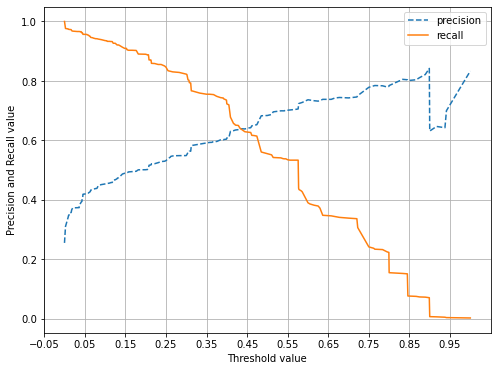

In [33]:
precision_recall_curve_plot(y_test, pred_proba_dt[:, 1])

>Random Forest

In [34]:
predrf = rf_clf_best.predict(x_test)
pred_probarf = rf_clf_best.predict_proba(x_test)[:, 1]

get_eval_by_threshold(y_test, pred_probarf.reshape(-1, 1), threshholds)

임계값: 0.3
오차 행렬
[[3614  960]
 [ 287 1283]]
정확도: 0.7970, 정밀도: 0.5720, 재현율: 0.8172, F1: 0.6730, AUC: 0.8037
임계값: 0.33
오차 행렬
[[3706  868]
 [ 336 1234]]
정확도: 0.8040, 정밀도: 0.5871, 재현율: 0.7860, F1: 0.6721, AUC: 0.7981
임계값: 0.36
오차 행렬
[[3775  799]
 [ 380 1190]]
정확도: 0.8081, 정밀도: 0.5983, 재현율: 0.7580, F1: 0.6687, AUC: 0.7916
임계값: 0.39
오차 행렬
[[3848  726]
 [ 425 1145]]
정확도: 0.8127, 정밀도: 0.6120, 재현율: 0.7293, F1: 0.6655, AUC: 0.7853
임계값: 0.42
오차 행렬
[[4027  547]
 [ 551 1019]]
정확도: 0.8213, 정밀도: 0.6507, 재현율: 0.6490, F1: 0.6499, AUC: 0.7647
임계값: 0.45
오차 행렬
[[4133  441]
 [ 667  903]]
정확도: 0.8197, 정밀도: 0.6719, 재현율: 0.5752, F1: 0.6198, AUC: 0.7394
임계값: 0.48
오차 행렬
[[4251  323]
 [ 778  792]]
정확도: 0.8208, 정밀도: 0.7103, 재현율: 0.5045, F1: 0.5899, AUC: 0.7169
임계값: 0.5
오차 행렬
[[4297  277]
 [ 848  722]]
정확도: 0.8169, 정밀도: 0.7227, 재현율: 0.4599, F1: 0.5621, AUC: 0.6997


#### Random Forest의 베스트

In [44]:
binarizer_rf = Binarizer(threshold=0.42)
pred_rf_042 = binarizer_rf.fit_transform(pred_probarf.reshape(-1, 1))
get_clf_eval(y_test, pred_rf_042)

오차 행렬
[[4027  547]
 [ 551 1019]]
정확도: 0.8213, 정밀도: 0.6507, 재현율: 0.6490, F1: 0.6499, AUC: 0.7647


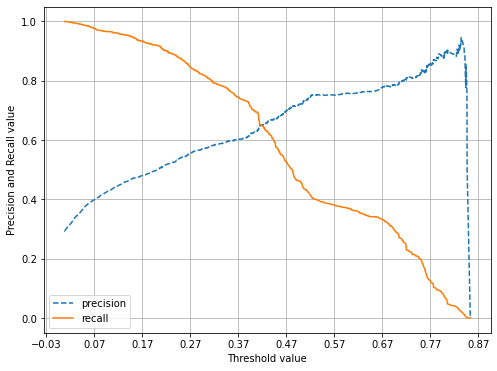

In [35]:
precision_recall_curve_plot(y_test, pred_probarf)

>Logistic Regression

In [36]:
predlr = lr_clf_best.predict(x_test)
pred_probalr = lr_clf_best.predict_proba(x_test)[:, 1]

get_eval_by_threshold(y_test, pred_probalr.reshape(-1, 1), threshholds)

임계값: 0.3
오차 행렬
[[3631  943]
 [ 495 1075]]
정확도: 0.7660, 정밀도: 0.5327, 재현율: 0.6847, F1: 0.5992, AUC: 0.7393
임계값: 0.33
오차 행렬
[[3755  819]
 [ 556 1014]]
정확도: 0.7762, 정밀도: 0.5532, 재현율: 0.6459, F1: 0.5959, AUC: 0.7334
임계값: 0.36
오차 행렬
[[3869  705]
 [ 636  934]]
정확도: 0.7817, 정밀도: 0.5699, 재현율: 0.5949, F1: 0.5821, AUC: 0.7204
임계값: 0.39
오차 행렬
[[3977  597]
 [ 705  865]]
정확도: 0.7881, 정밀도: 0.5917, 재현율: 0.5510, F1: 0.5706, AUC: 0.7102
임계값: 0.42
오차 행렬
[[4048  526]
 [ 767  803]]
정확도: 0.7896, 정밀도: 0.6042, 재현율: 0.5115, F1: 0.5540, AUC: 0.6982
임계값: 0.45
오차 행렬
[[4113  461]
 [ 824  746]]
정확도: 0.7909, 정밀도: 0.6181, 재현율: 0.4752, F1: 0.5373, AUC: 0.6872
임계값: 0.48
오차 행렬
[[4189  385]
 [ 876  694]]
정확도: 0.7948, 정밀도: 0.6432, 재현율: 0.4420, F1: 0.5240, AUC: 0.6789
임계값: 0.5
오차 행렬
[[4230  344]
 [ 920  650]]
정확도: 0.7943, 정밀도: 0.6539, 재현율: 0.4140, F1: 0.5070, AUC: 0.6694


#### Logistic Regression의 베스트

In [47]:
binarizer_lr = Binarizer(threshold=0.37)
pred_lr_037 = binarizer_lr.fit_transform(pred_probalr.reshape(-1, 1))
get_clf_eval(y_test, pred_lr_037)

오차 행렬
[[3900  674]
 [ 663  907]]
정확도: 0.7824, 정밀도: 0.5737, 재현율: 0.5777, F1: 0.5757, AUC: 0.7152


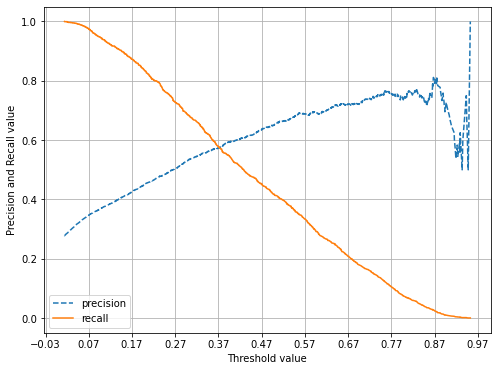

In [37]:
precision_recall_curve_plot(y_test, pred_probalr)

In [38]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)

    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
    

#### 각 모델의 ROC 곡선 및 AUC 값 확인

>Decision Tree

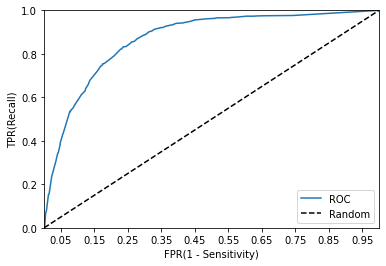

ROC AUC 값: 0.8679


In [39]:
roc_curve_plot(y_test, pred_proba_dt[:, 1])
roc_score_dt = roc_auc_score(y_test, pred_proba_dt[:, 1])
print('ROC AUC 값: {0:.4f}'.format(roc_score_dt))

>Random Forest

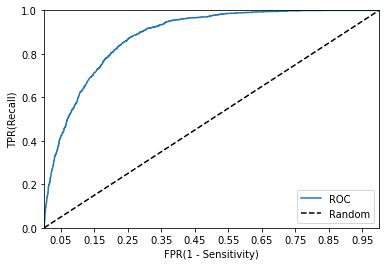

ROC AUC 값: 0.8835


In [40]:
roc_curve_plot(y_test, pred_probarf)
roc_score_rf = roc_auc_score(y_test, pred_probarf)
print('ROC AUC 값: {0:.4f}'.format(roc_score_rf))

>Logistic Regression

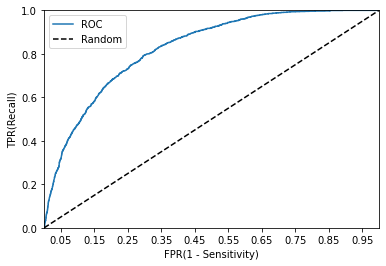

ROC AUC 값: 0.8258


In [41]:
roc_curve_plot(y_test, pred_probalr)
roc_score_lr = roc_auc_score(y_test, pred_probalr)
print('ROC AUC 값: {0:.4f}'.format(roc_score_lr))

In [61]:
# GBM Hyper parameter
params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.05, 0.1, 0.15, 0.2]
}

from sklearn.ensemble import GradientBoostingClassifier

# GBM model
grid_cv = GridSearchCV(GradientBoostingClassifier(random_state=0), param_grid=params, cv=2, verbose=1)
grid_cv.fit(x_train, y_train)
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))


Fitting 2 folds for each of 20 candidates, totalling 40 fits
최적 하이퍼 파라미터:  {'learning_rate': 0.05, 'n_estimators': 300}
최고 예측 정확도: 0.8290


## 결론
전처리를 잘하자  
-> 의외로 전처리를 많이 안하는편이 좋을 수도 있음

무리하게 단순화 시키려고 하지 말자 (튜닝의 끝은 순정이다)